<p style="text-align: center;"><img src="http://www.ucm.es/logo/ucm.png" alt="ucm" style="height: 100px;"/>   <img src="https://www.ucm.es/data/cont/media/www/pag-18458/logo_aocg.jpg" alt="aocg" style="height: 100px;"/> 

&nbsp;

<div align="center"> 
<font size=5> Universidad Complutense de Madrid</font>
</div>
    
<div align="center"> 
<font size=4> Grupo Computense de Óptica Aplicada </font>
</div>
&nbsp;

&nbsp;



    
<div align="center"> 
<font size=6> Alineamiento de una lámina de cuarto de onda </font>
</div>

Es necesario encontrar un método para encontrar el eje rápido de una lámina de cuarto de onda sin necesitar otra lámina de cuarto de onda ya calibrada.

In [1]:
from py_pol.jones_matrix import Jones_matrix, Jones_vector, np, degrees
import matplotlib.pyplot as plt

# Metodo 1

El metodo uno consiste en un interferómetro de Mach-Zehnder donde en cada brazo se genera una polarización lineal diferente. A la salida del interferómetro se coloca el retardador que se quiere medir (lámina de cuarto de onda, por ejemplo), y un polarizador de medida. El esquema se puede ver en la figura.

<img src="Metodo 1.png" /> 

## Parametros perfectos

Minimos:  [ 90 125 180 235 270 235 180 125]
Maximos:  [270 305 360  55  90  55 360 305]


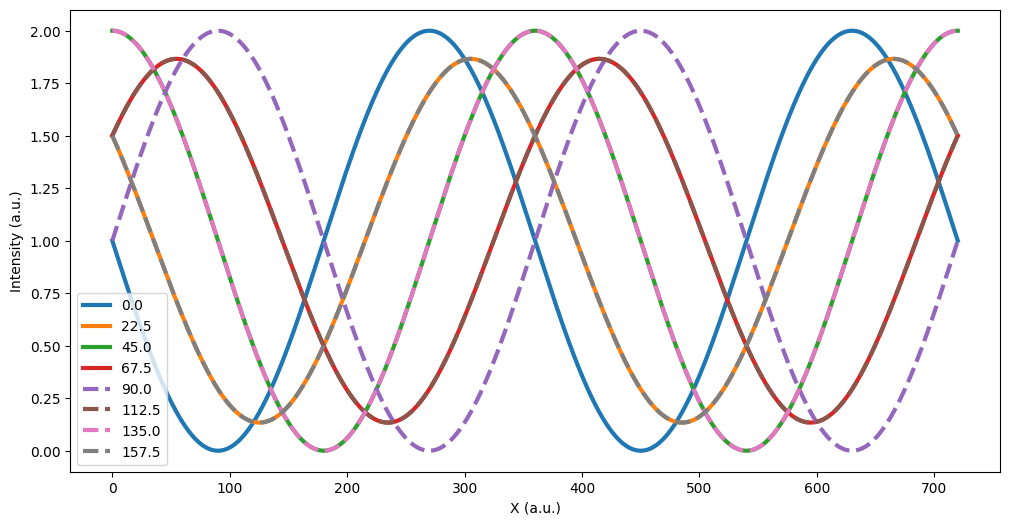

In [5]:
# Metodo 1
Nfases = 2
Nangles = 8
Ret = 90*degrees
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)

E1 = Jones_vector().linear_light(azimuth=90*degrees)
E2 = Jones_vector().linear_light(azimuth=0*degrees, global_phase=Fase)
E = E1 + E2
Q = Jones_matrix().retarder_linear(R=Ret, azimuth=Angles)
P = Jones_matrix().diattenuator_perfect(azimuth=45*degrees)
Efinal = P * Q * E

I = Efinal.parameters.intensity()
plt.figure(figsize=(12,6))
for ind in range(Nangles):
    ls = "-" if ind < Nangles/2 else "--"
    plt.plot(I[:,ind], linestyle=ls, linewidth=3)
plt.xlabel("X (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.legend(legend)

mins = I[45:405, :].argmin(axis=0) + 45
maxs = I[45:405, :].argmax(axis=0) + 45

print("Minimos: ", mins)
print("Maximos: ", maxs)



# Matemáticas

Vamos a comprobar si la ecuación que obtuve es correcta.

Minimos:  [150, 159, 180, 201, 210, 201, 180, 159]
Maximos:  [330, 339, 360, 381, 390, 381, 360, 339]


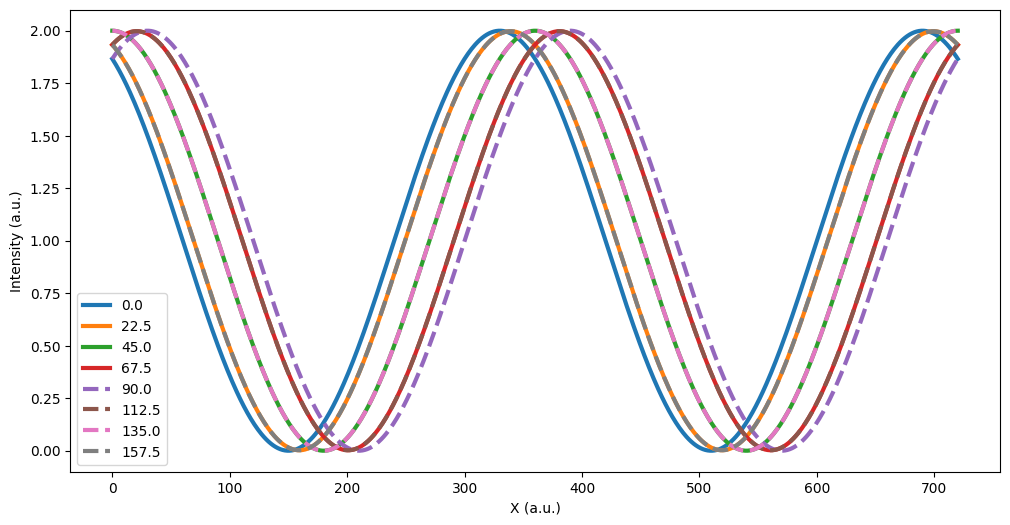

In [11]:
# Parametros
Nfases = 2
Nangles = 8
fase = np.linspace(0, Nfases * 360*degrees, Nfases * 360 + 1)
angles = np.linspace(0, 180*degrees, Nangles, endpoint=False)
Angles, Fase = np.meshgrid(angles, fase)
legend = np.round(angles / degrees, 1)
Ret = 30*degrees

# Mates
plt.figure(figsize=(12,6))
mins = []
maxs = []
for ind, angle in enumerate(angles):
    I = 1 - np.sin(fase) * np.cos(2*angle) * np.sin(Ret) + np.cos(fase) * (np.cos(Ret) * np.cos(2*angle)**2 + np.sin(2*angle)**2)
    ls = "-" if ind < Nangles/2 else "--"
    plt.plot(I, linestyle=ls, linewidth=3)
    mins.append(I[45:405].argmin() + 45)
    maxs.append(I[45:405].argmax() + 45)

        
plt.xlabel("X (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.legend(legend)

print("Minimos: ", mins)
print("Maximos: ", maxs)

Perfecto!!!

# Maximos y minimos

Los maximos y minimos de difracción siguen una ecuación que depende del ángulo de giro y 